In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import cm
from sam_sat import *

sigma = 5.670367e-8
myfontsize = 12

f = xr.open_dataset('All_2014_NCEP_1stprcesd_gridded.nc').load()
f.close()

f_DJF = xr.open_dataset("All_2014_NCEP_1stprcesd_gridded_DJF.nc").load()
f_DJF.close()

f_JJA = xr.open_dataset("All_2014_NCEP_1stprcesd_gridded_JJA.nc").load()
f_JJA.close()

f = f.where(f.CTRC != -999.)
f_DJF = f_DJF.where(f_DJF.CTRC != -999.)
f_JJA = f_JJA.where(f_JJA.CTRC != -999.)

ff = f.groupby(f.Latitude).mean(dim = 'Longitude')
ff_DJF = f_DJF.groupby(f_DJF.Latitude).mean(dim = 'Longitude')
ff_JJA = f_JJA.groupby(f_JJA.Latitude).mean(dim = 'Longitude')

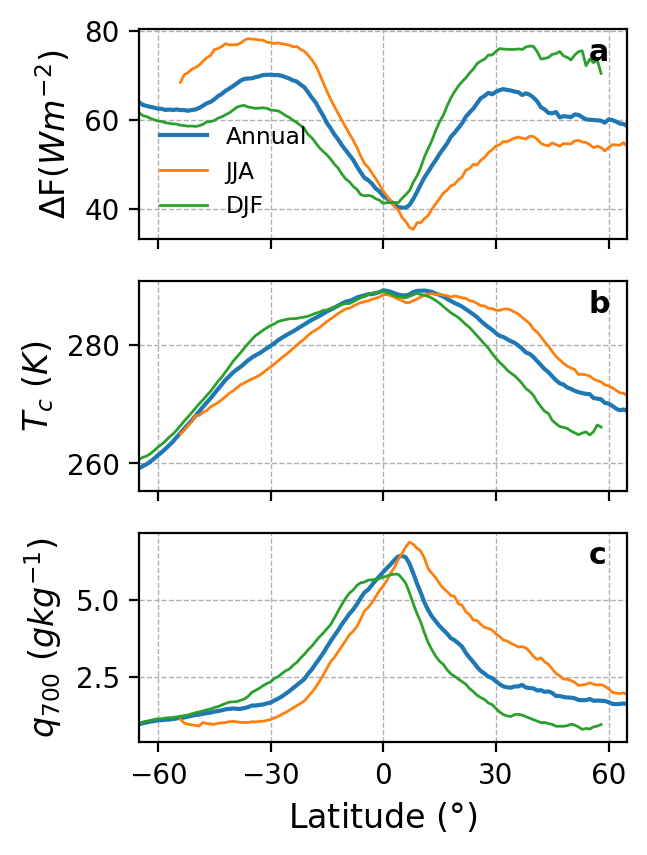

In [4]:
fig, ax = plt.subplots(ncols = 1,
                        nrows = 3,
                        sharex = True, sharey = False,
                        figsize=(8/2.54, (12)/2.54), dpi = 200)

ax[0].plot(ff.Latitude, -(ff.LW_cool + ff.SW_heat_dmean), label = 'Annual')
ax[0].plot(ff_JJA.Latitude, -(ff_JJA.LW_cool + ff_JJA.SW_heat_dmean), lw = 1, label = 'JJA')
ax[0].plot(ff_DJF.Latitude, -(ff_DJF.LW_cool + ff_DJF.SW_heat_dmean), lw = 1, label = 'DJF')

ax[0].set_ylabel('$\mathrm{\Delta F} (W m^{-2}$)', fontsize=myfontsize)
ax[0].legend(loc="best", fontsize=0.7*myfontsize, frameon=False)

ax[1].plot(ff.Latitude, ff.CTT + 273.15)
ax[1].plot(ff_JJA.Latitude, ff_JJA.CTT + 273.15, lw = 1)
ax[1].plot(ff_DJF.Latitude, ff_DJF.CTT + 273.15, lw = 1)
ax[1].set_ylabel("$T_{c}$ $(K)$", fontsize=myfontsize)

ax[2].plot(ff.Latitude, 1000.*qsatw(ff.TMP_700mb.values,700.)*ff.RH_700mb.values/100.)
ax[2].plot(ff_JJA.Latitude, 1000.*qsatw(ff_JJA.TMP_700mb.values,700.)*ff_JJA.RH_700mb.values/100., lw = 1)
ax[2].plot(ff_DJF.Latitude, 1000.*qsatw(ff_DJF.TMP_700mb.values,700.)*ff_DJF.RH_700mb.values/100., lw = 1)
ax[2].set_ylabel("$q_{700}$ $(gkg^{-1})$", fontsize=myfontsize)

ax[0].set_xticks(ticks=[-60, -30, 0, 30, 60])
ax[0].grid(linestyle='--', linewidth=0.5)
ax[1].set_xticks(ticks=[-60, -30, 0, 30, 60])
ax[1].grid(linestyle='--', linewidth=0.5)
ax[2].set_xticks(ticks=[-60, -30, 0, 30, 60])
ax[2].grid(linestyle='--', linewidth=0.5)

ax[2].set_xlabel("Latitude ($\degree$)", fontsize=myfontsize)
ax[2].set_xlim(-65, 65)

for i, label in enumerate(('a', 'b','c')):
    ax[i].text(0.92, 0.85, label, transform=ax[i].transAxes,
                fontsize=0.9*myfontsize, fontweight='bold')

fig.savefig('Fig2_zonal-mean.png', dpi=fig.dpi, bbox_inches='tight')